In [12]:
# imports 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from brokenaxes import brokenaxes
import seaborn as sns

In [13]:
file_path = ('/Users/aryellewright/Documents/Documents - Aryelle’s MacBook Air/Kumar-Biomaterials-Lab/Complement_Assay_Plots/20240319_C4d_1-100dilution.xlsx')
sheet_name = "Sheet1"  
df = pd.read_excel(file_path, sheet_name=sheet_name)

In [14]:
# saving variables for plotting
polymer = df['Polymer'][::-1]
n_p_ratio = df['N/P ratio'][::-1]
concetration = df['Concentration'][::-1]
stdev = df['Stdev'][::-1]

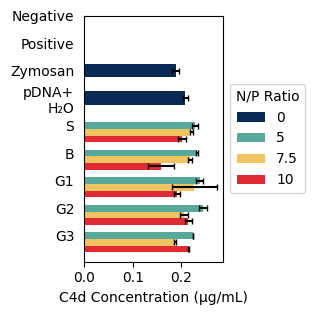

In [15]:
# Define the order of your polymers or conditions
polymer_order = ['Negative', 'Positive', 'Zymosan', 'pDNA+\nH₂O', 'S','B','G1','G2','G3']
df['Polymer'] = pd.Categorical(df['Polymer'], categories=polymer_order, ordered=True)
df_sorted = df.sort_values(by=['Polymer', 'N/P ratio'])

fig, ax = plt.subplots(figsize=(3.25, 3.25))
bar_width = 0.24  
larger_bar_width = 0.5
unique_polymers = df_sorted['Polymer'].unique()
unique_ratios = df_sorted['N/P ratio'].unique()
positions = np.arange(len(polymer_order))  

colors = {
    '0.0': '#082a54',   
    '1.0': '#a559aa',   
    '5.0': '#59a89c',   
    '7.5': '#f0c561',   
    '10.0': '#e02b35'   
}

legend_dict = {}
ratio_index = {ratio: idx for idx, ratio in enumerate(unique_ratios)}

for j, polymer in enumerate(polymer_order):
    num_bars_for_polymer = len(df_sorted[df_sorted['Polymer'] == polymer]['N/P ratio'].unique())
    start_pos = positions[j] - bar_width * (num_bars_for_polymer - 1) / 2

    for i, ratio in enumerate(unique_ratios):
        if ratio in df_sorted[df_sorted['Polymer'] == polymer]['N/P ratio'].values:
            polymer_data = df_sorted[(df_sorted['Polymer'] == polymer) & (df_sorted['N/P ratio'] == ratio)]
            position = start_pos + bar_width * ratio_index[ratio]
            color = colors[str(ratio)]
            bar_height = larger_bar_width if polymer in ['pDNA+\nH₂O', 'Negative', 'Positive', 'Zymosan'] else bar_width
            
            bar = ax.barh(position, polymer_data['Concentration'].mean(), xerr=polymer_data['Stdev'].mean(), 
                          color=color, height=bar_height, capsize=2.5)
            
            if ratio not in legend_dict:
                legend_dict[ratio] = bar

legend_handles = []
legend_labels = []

for ratio, bar_container in legend_dict.items():
    if len(bar_container.patches) > 0:
        first_bar = bar_container.patches[0]
        legend_handles.append(first_bar)
        
        if ratio == 7.5 or ratio == '7.5':
            legend_labels.append('7.5')
        else:
            legend_labels.append(str(int(float(ratio)))) 

ax.set_yticks(positions)
ax.set_yticklabels(polymer_order)
ax.invert_yaxis() 
ax.set_xlabel('C4d Concentration (µg/mL)')
ax.legend(handles=legend_handles, labels=legend_labels, title='N/P Ratio', loc='upper left', bbox_to_anchor=(1, 0.75))
ax.tick_params(axis='y', which='both', left=False)  

plt.tight_layout()
plt.show()